LOGISTIC REGRESSION FOR EMAIL SPAM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

LOADING THE DATASET

In [ ]:
SH = pd.read_csv("/content/spam_ham_dataset.csv")

In [ ]:
SH

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
X = SH['text']
y = SH['label_num']

# EDA

In [ ]:
SH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


The spam ham data compriss mostly of text that is for label and text which are object dtype

In [ ]:
SH.isnull().sum()

,0
Unnamed: 0,0
label,0
text,0
label_num,0


No missing or negtive values

In [ ]:
SH.shape

(5171, 4)

label
ham     3672
spam    1499
Name: count, dtype: int64


<Axes: title={'center': 'Class Distribution: Ham vs Spam'}, xlabel='label'>

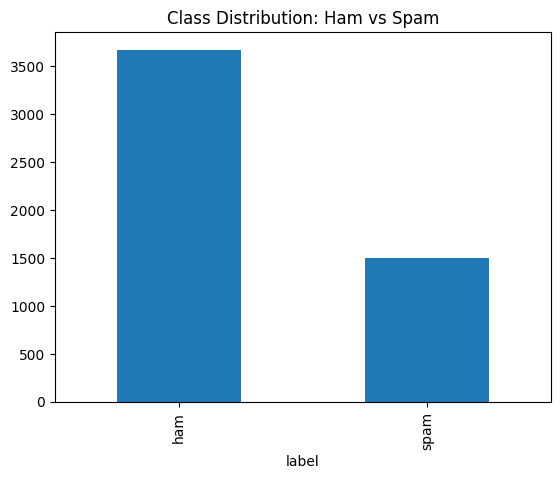

In [ ]:
# Class distribution
print(SH['label'].value_counts())
SH['label'].value_counts().plot(kind='bar', title='Class Distribution: Ham vs Spam')

There are more  legitimate emails than those that are spams

Adding a column for the length of emails

In [ ]:
SH['text_length'] = SH['text'].apply(len)

In [ ]:
SH

,Unnamed: 0,label,text,label_num,text_length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,534
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,402
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,573


<Axes: title={'center': 'Text Length (Spam)'}, ylabel='Frequency'>

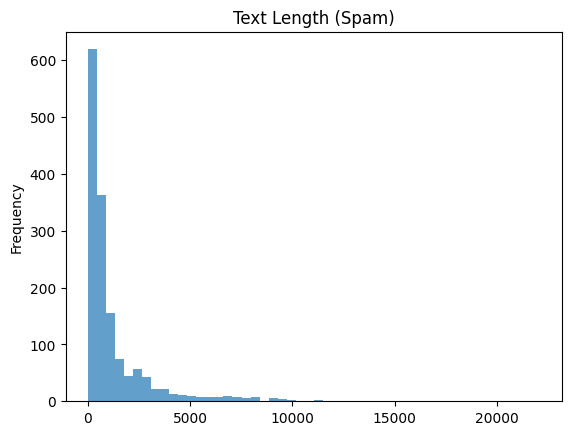

In [ ]:
SH[SH['label'] == 'spam']['text_length'].plot(kind='hist', bins=50, title='Text Length (Spam)', alpha=0.7)



<Axes: title={'center': 'Text Length (Ham)'}, ylabel='Frequency'>

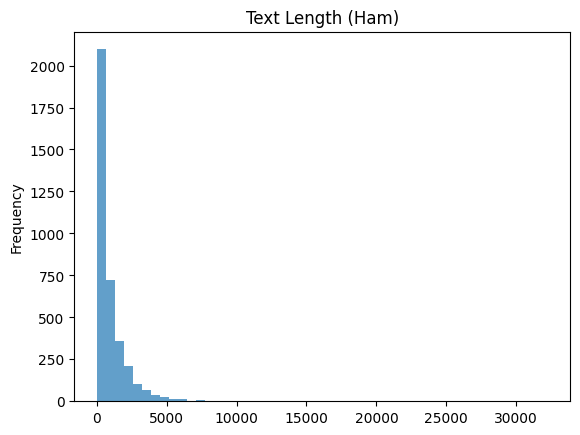

In [ ]:
# Distribution of text length for ham vs spam
SH[SH['label'] == 'ham']['text_length'].plot(kind='hist', bins=50, title='Text Length (Ham)', alpha=0.7)


In the two graphs above we see that the  text length for ham is usually more than that of spam emails



# Frequent words used in ham and spam mails

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Top words in ham emails
ham_text = SH[SH['label'] == 'ham']['text']
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X_ham = vectorizer.fit_transform(ham_text)
print('Top words in ham emails:', vectorizer.get_feature_names_out())

# Top words in spam emails
spam_text = SH[SH['label'] == 'spam']['text']
X_spam = vectorizer.fit_transform(spam_text)
print('Top words in spam emails:', vectorizer.get_feature_names_out())

Top words in ham emails: ['00' '000' '01' '10' '2000' '2001' 'cc' 'com' 'corp' 'daren' 'deal' 'ect'
 'enron' 'gas' 'hou' 'hpl' 'meter' 'pm' 'subject' 'thanks']
Top words in spam emails: ['00' '99' 'com' 'company' 'email' 'font' 'free' 'height' 'http'
 'information' 'nbsp' 'new' 'pills' 'price' 'size' 'statements' 'subject'
 'td' 'time' 'www']


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


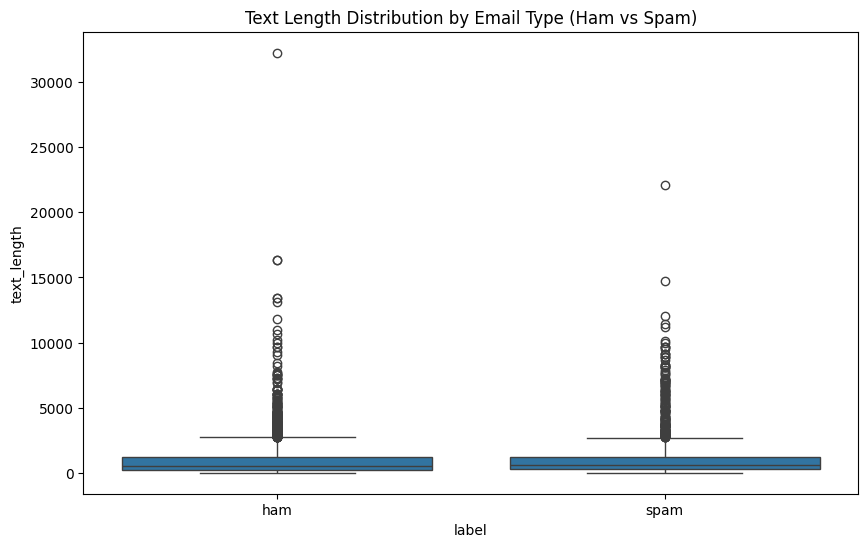

In [ ]:
# Visualizing the distribution of text length for ham vs spam using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=SH)
plt.title('Text Length Distribution by Email Type (Ham vs Spam)')
plt.show()



In [ ]:
SH

,Unnamed: 0,label,text,label_num,text_length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336
...,...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0,534
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0,402
5169,1409,ham,Subject: industrial worksheets for august 2000...,0,573


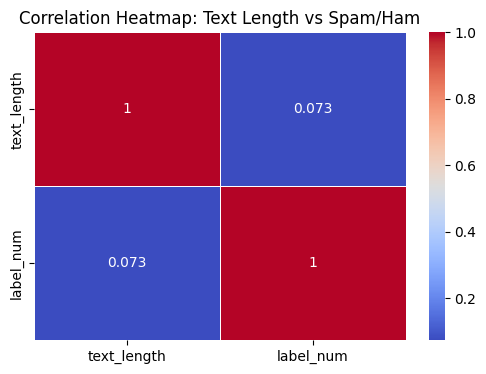

In [ ]:
correlation_matrix = SH[['text_length', 'label_num']].corr()

# Step 4: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Text Length vs Spam/Ham')
plt.show()

## Converting text documents to a matrix of token occurrences usind Tfidvetorizers

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_vectorized = tfidf.fit_transform(X)

TRAINING AND TESTING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 98.74%


the logistic model can correctly predict outcomes at 98.74% level of accuracy.

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.98      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035

Confusion Matrix:
[[735   7]
 [  6 287]]


From the confusion matrix above

True Positives: 287 email that were spam were correctly predicted.

True Negatives: 735 email that were not spam were correctly predicted.

False Positives: 7 email that were not spam were incorrectly predicted as spam.

False Negatives: 6 email that were spam were incorrectly predicted as not spam.

Precision interprtation
For no spam: 0.99, meaning that 99% of the predicted negatives are actually negative.
For spam: 0.98, meaning 98% of the predicted positives are actually positive.

F1-Score interprtation
For no spam: 0.99 show the model has strong performance in both precision and recall.
For spam: 0.98 means good balance between precision and recall.

Accuracy 99% means 99% of all predictions were correct using LOGISTIC REGRESSION.
